In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import copy

In [3]:
sns.set_theme()

In [4]:
def plot_data(x):
    x = np.array(x)
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()
    
def plot_clusters(x, clusters):
    x = np.array(x)
    df = pd.DataFrame(x, columns=['x', 'y'])
    df['cluster'] = clusters
    sns.scatterplot(data=df, x='x', y='y', hue='cluster')
    plt.show()

#### Data sample


In [5]:
x = [[1, 1], [1, 0], [0, 1], [0, 0], [0.5, 0.5], [0.5, 0.6], 
     [0.6, 0.5], [0.6, 0.6], [10, 10], [11, 11], [10.5, 10.5], 
     [15, 12], [15, 15], [15, 13], [20, 20], [0, 15]]

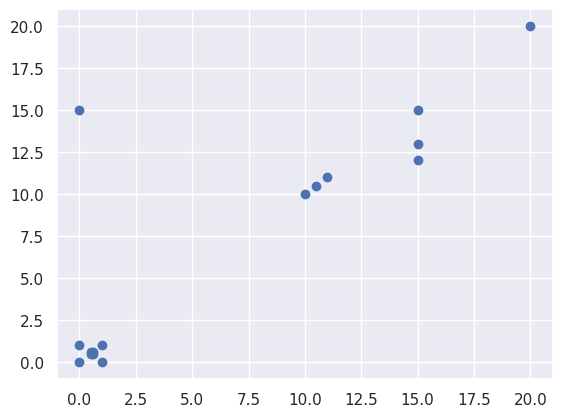

In [6]:
plot_data(x)

#### DBSCAN IMPLEMENTATION

In [49]:
class DBSCAN:
    def __init__(self, data, eps, min_samples):
        
        self.data = np.array(copy.deepcopy(data))
        self.eps = eps
        self.min_samples = min_samples
        self.neighbours = [self.get_neighbours(point) for point in self.data]
        self.core_points = [point_id for point_id, neighbours in enumerate(self.neighbours) if len(neighbours) >= self.min_samples]
        self.current_cluster = 0
        self.labels = [-1] * len(self.data)
        self.visited = [0] * len(self.data)
    
    def cal_euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def get_neighbours(self, point):
        neightbours = []
        for i in range(len(self.data)):
            if self.cal_euclidean_distance(self.data[i], point) <= self.eps:
                neightbours.append(i)
        return neightbours

    def assign_label(self, current_cluster, core_point, neighbours):
        self.visited[core_point] = 1
        self.labels[core_point] = current_cluster
        for neighbour_id in neighbours:
            if neighbour_id == core_point or self.visited[neighbour_id] == 1:
                continue
            if neighbour_id in self.core_points:
                self.assign_label(current_cluster, neighbour_id, self.neighbours[neighbour_id])
            elif self.labels[neighbour_id] == -1:
                self.labels[neighbour_id] = current_cluster
        
    def fit(self):
        if len(self.core_points) == 0:
            return self.labels
        for core_point in self.core_points:
            if self.visited[core_point] == 1:
                continue
            self.assign_label(self.current_cluster, core_point, self.neighbours[core_point])
            self.current_cluster += 1
            
        return np.array(self.labels)
                

##### TEST WITH MY DBSCAN

In [50]:
dbscan = DBSCAN(x, eps=2, min_samples=3)
clusters = dbscan.fit()

In [51]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2, -1, -1])

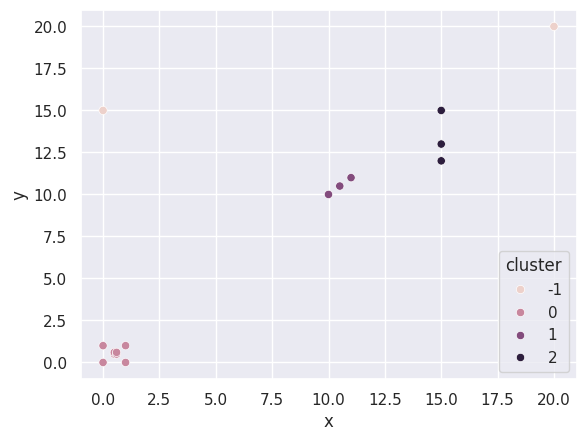

In [52]:
plot_clusters(x, clusters)

##### TEST WITH SKLEARN

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [53]:
from sklearn.cluster import DBSCAN as skDBSCAN

dbscan = skDBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(x)

In [54]:
clusters


array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2, -1, -1])

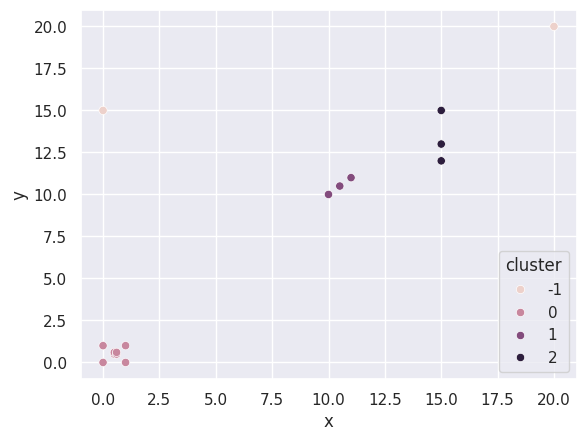

In [55]:
plot_clusters(x, clusters)

#### Random Sample

In [56]:
from sklearn.datasets import make_blobs

In [57]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=226)

In [58]:
data = pd.DataFrame(X, columns=['x', 'y']).to_numpy()

In [59]:
data

array([[ 3.3968002 ,  4.36957173],
       [-4.41280596,  9.74944306],
       [ 3.94262104,  3.92728411],
       ...,
       [ 0.02503552, -2.00490512],
       [11.89127072, -3.65105736],
       [ 8.93698189, -2.43246911]])

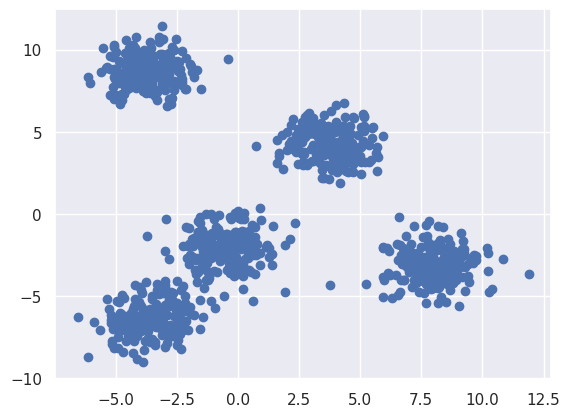

In [60]:
plot_data(data)

##### My own DBSCAN

In [61]:
dbscan = DBSCAN(data, eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit()

In [62]:
dbscan_labels

array([ 0,  1,  0,  0,  1,  2,  0,  1,  3,  1,  1,  3,  1,  1,  4,  3,  2,
        1,  3,  0,  0,  1,  4,  1, -1,  0,  0,  0,  0,  4,  0,  3,  1,  2,
       -1,  0,  3,  1,  2,  3,  0, -1,  2,  0,  4,  3,  1,  3,  0, -1,  2,
       -1,  0,  2,  0,  1,  4,  1,  0,  1,  0,  2,  2,  0,  2,  4, -1,  3,
       -1,  3,  3,  2, -1, -1, -1,  4,  4,  0,  4,  0,  3,  3,  2,  1,  4,
        4,  4,  3,  0,  2,  2,  2,  0, -1,  3,  3,  1,  4,  0,  1, -1,  4,
        1,  0,  2,  0,  2,  2,  0,  3,  4,  2,  1,  4,  2,  3,  2,  1,  1,
        3,  2,  1,  2,  0,  1, -1,  1,  3,  3,  1,  1,  2,  3,  2,  1,  4,
        1,  1,  3,  4,  0,  0, -1,  3, -1,  3, -1,  4,  3,  3,  0,  3,  4,
        1,  0,  5,  0,  1,  3,  1,  0,  1,  0,  1,  2,  1,  3,  1,  4,  1,
        3,  3,  4, -1,  1,  4,  0,  3,  1,  3,  1,  2,  4,  2,  0, -1,  2,
        4,  3,  3, -1,  3,  0,  1,  4, -1,  2,  2,  4,  1,  1,  0,  1,  3,
        3,  2,  1, -1, -1, -1,  1,  3,  2,  3,  3,  2,  2,  4,  2,  4, -1,
        3,  0,  2,  2, -1

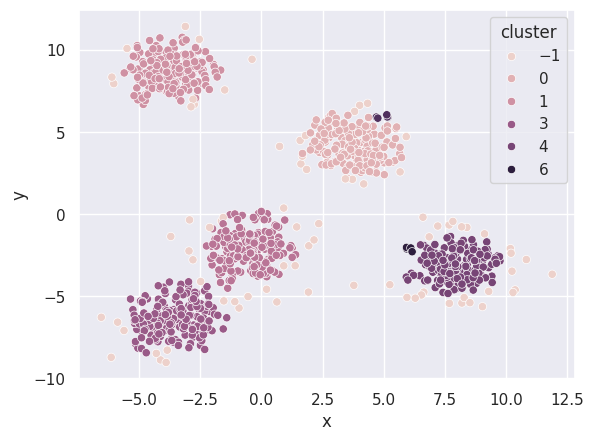

In [63]:
plot_clusters(data, dbscan_labels)

##### SKLEARN

In [65]:
# Using sklearn
dbscan = skDBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

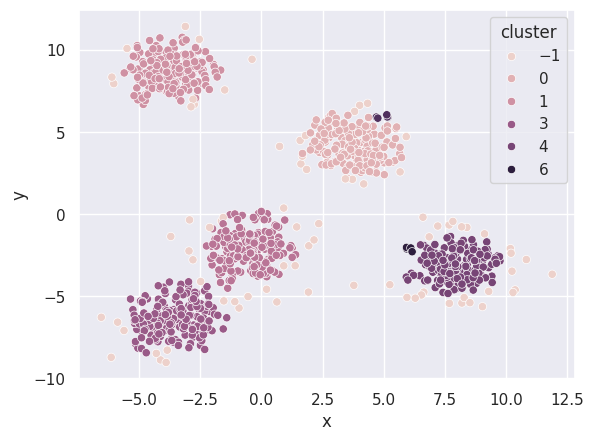

In [66]:
plot_clusters(data, labels)